In [24]:
from BMI_HBVmountain_Python import *

## Load forcing data

In [89]:
forcing = nc.Dataset('Data/ThunderCreek/HBVmountain_ERA5_ThunderCreek_1986_2005.nc')

## Setting up the model

In [90]:
path_to_observation = 'Data/ThunderCreek/Discharge_ThunderCreek.csv' #GRDC observation data
path_to_shapefile = 'Data/ThunderCreek/Shapes/Thundercreek.shp' #Catchment shapefile from GRDC
path_to_dem = 'Data/ThunderCreek/dem_thundercreek_full.tif' #DEM tiles over the catchment area
path_to_nlcd = 'Data/ThunderCreek/landuse_thundercreek.tif' 

In [92]:
model = BMI_HBVmountain(forcing, path_to_shapefile, path_to_dem, path_to_nlcd)

In [93]:
config_file = model.setup()

In [94]:
model.initialize(config_file)

## Load GRDC streamflow data

In [91]:
area = gpd.read_file(path_to_shapefile).area_hys.values[0]
observation = pd.read_csv('Data/ThunderCreek/Discharge_ThunderCreek.csv', index_col=0, parse_dates=True)/ (area * 1e6) * 1000 *86400 

## Running the model

In [95]:
Discharge = []
timestamp = []
while (model.get_value_ptr('Current_Date') < (datetime.date(1999, 1, 1))):  
    model.update()
    timestamp.append(model.get_value_ptr('Current_Date'))
    Discharge.append(model.get_value_ptr('Discharge'))

## Analysis

In [96]:
simulated_discharge_df = pd.DataFrame(
    {'simulation': Discharge},
    index=pd.to_datetime(timestamp)
)
combined_discharge = pd.merge(simulated_discharge_df, observation['streamflow'], left_index=True, right_index=True)
combined_discharge

,simulation,streamflow
1986-01-02,0.000000,0.954176
1986-01-03,0.004559,0.936702
1986-01-04,0.007523,0.927653
1986-01-05,0.000164,0.927653
1986-01-06,0.018271,0.945439
...,...,...
1998-12-28,2.971202,3.242574
1998-12-29,3.819901,6.388108
1998-12-30,9.310413,8.181634
1998-12-31,4.071483,5.893235


<AxesSubplot:>

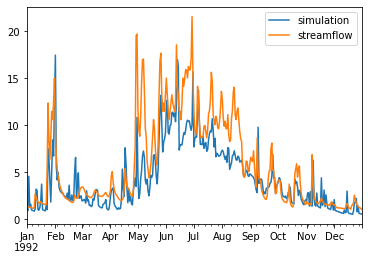

In [97]:
combined_discharge.loc[combined_discharge.index.year == 1992].plot()

## Clean up

In [87]:
model.finalize()